In [1]:
from CDFM3SF import CDFM3SF
import torch
import matplotlib.pyplot as plt
import numpy as np
from my_dataset import get_dataset_paths, MyDataset
from torch.utils.data import DataLoader
import torchvision.transforms as tr
from torch.utils.data import Dataset
from images_utils import imgread
from saver import Saver
import os
from my_transforms import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

cuda


In [3]:
train_paths, test_paths = get_dataset_paths()
print(len(train_paths))
print(len(test_paths))

18306
9134


In [4]:
transform = tr.Compose([
    MyToTensor()
])
dataset = MyDataset(test_paths, transform=transform)
loader = DataLoader(dataset, batch_size=4, shuffle=True)


In [5]:
model = CDFM3SF([4, 6, 3], gf_dim=64)
model = model.to(device)

In [6]:
saver = Saver(model)
saver.load()

Loaded model c:\Users\Valerio\Desktop\tesi\models\model_130.pth
Current model 130


In [7]:
def show_example(loader):
    (d10m, d20m, d60m), label = next(iter(loader))
    d10m = d10m.to(device)
    d20m = d20m.to(device)
    d60m = d60m.to(device)
    label = label.to(device)

    out = model(d10m, d20m, d60m)

    number_of_examples = label.shape[0]

    fig, axs = plt.subplots(number_of_examples, 6, figsize=(15, 7))
    for i in range(number_of_examples):
        axs[i][0].imshow(out[0].cpu()[i][0].detach().numpy())
        axs[i][1].imshow(out[1].cpu()[i][0].detach().numpy())
        axs[i][2].imshow(out[2].cpu()[i][0].detach().numpy())

        result = torch.sigmoid(out[0].cpu()[i][0].detach()).numpy()
        axs[i][3].imshow(result, cmap='gray', vmin=0, vmax=1)

        result[result < 0.5] = 0
        result[result >= 0.5] = 1
        axs[i][4].imshow(result, cmap='gray', vmin=0, vmax=1)

        axs[i][5].imshow(label.cpu()[i][0].detach().numpy(), cmap='gray')

    axs[0, 0].set_title('10m')
    axs[0, 1].set_title('20m')
    axs[0, 2].set_title('60m')
    axs[0, 3].set_title('final')
    axs[0, 4].set_title('final trhesholded')
    axs[0, 5].set_title('label')
    
    plt.show()


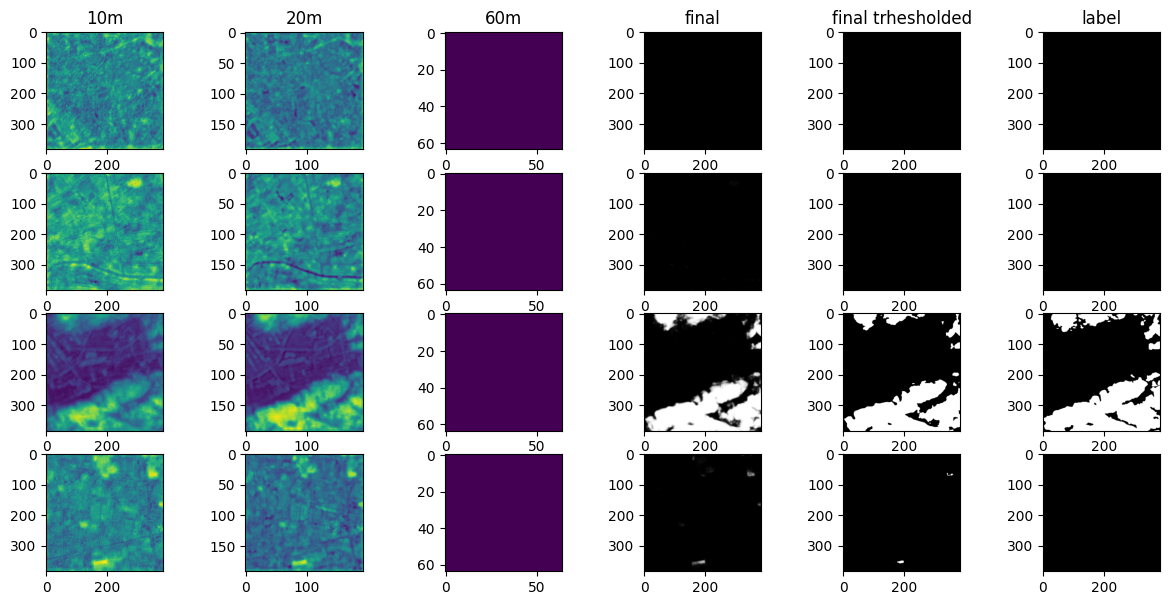

In [8]:
show_example(loader)